### Create expected plots for CohortTracker Tests

In [1]:
import matplotlib.pyplot as plt
import ehrapy as ep

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
current_notebook_dir = %pwd

_TEST_DATA_PATH = f"{current_notebook_dir}/../tools/ehrapy_data/dataset1.csv"
_TEST_IMAGE_PATH = f"{current_notebook_dir}/../tools/_images"
adata_mini = ep.io.read_csv(_TEST_DATA_PATH, columns_obs_only=["glucose", "weight", "disease", "station"])

/Users/eljasroellin/Documents/ehrapy_theislab/ehrapy/ehrapy/anndata/anndata_ext.py:108: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  X = X.astype(np.number) if all_num else X.astype(object)


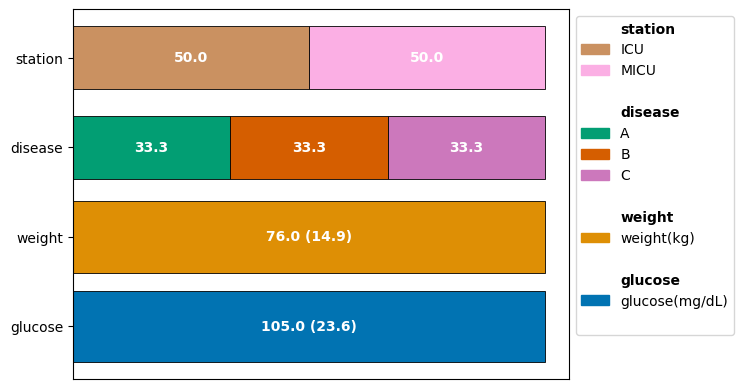

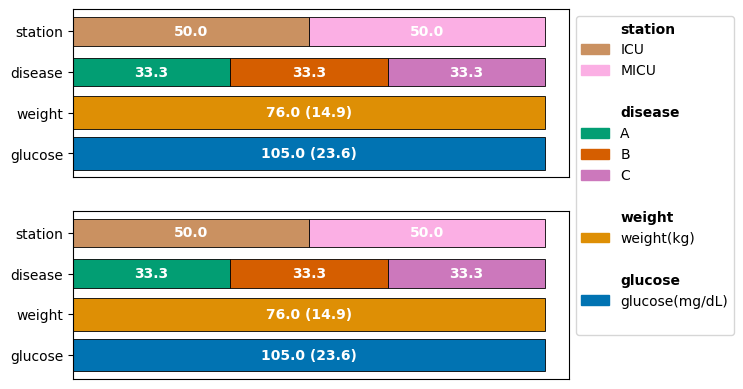

In [4]:
ct = ep.tl.CohortTracker(adata_mini)

ct(adata_mini, label="First step", operations_done="Some operations")
fig1, ax1 = ct.plot_cohort_barplot(show=False, legend_labels={"weight": "weight(kg)","glucose": "glucose(mg/dL)"})
ct(adata_mini, label="Second step", operations_done="Some other operations")
fig2, ax2 = ct.plot_cohort_barplot(show=False, legend_labels={"weight": "weight(kg)","glucose": "glucose(mg/dL)"})

fig1.savefig(
    f"{_TEST_IMAGE_PATH}/cohorttracker_adata_mini_step1_vanilla_expected.png",
    dpi=80,
)

fig2.savefig(
    f"{_TEST_IMAGE_PATH}/cohorttracker_adata_mini_step2_vanilla_expected.png",
    dpi=80,
)

In [ ]:
ct = ep.tl.CohortTracker(adata_mini)
ct(adata_mini, label="First step", operations_done="Some operations")
fig1_use_settings, _ = ct.plot_cohort_barplot(
    show=False,
    yticks_labels={"weight": "wgt"},
    legend_labels={"A": "Dis. A", "weight": "(kg)", "glucose": "glucose(mg/dL)"},
)

fig1_use_settings.savefig(
    f"{_TEST_IMAGE_PATH}/cohorttracker_adata_mini_step1_use_settings_expected.png",
    dpi=80,
)

In [ ]:
ct = ep.tl.CohortTracker(adata_mini)
ct(adata_mini, label="First step", operations_done="Some operations")
fig1_use_settings_big, _ = ct.plot_cohort_barplot(
    show=False,
    yticks_labels={"weight": "wgt"},
    legend_labels={"A": "Dis. A", "weight": "(kg)"},
    legend_subtitles=True,
    legend_subtitles_names={"station": "", "disease": "dis", "weight": "wgt", "glucose": "glc"},
)

fig1_use_settings_big.savefig(
    f"{_TEST_IMAGE_PATH}/cohorttracker_adata_mini_step1_use_settings_big_expected.png",
    dpi=80,
)

In [ ]:
adata_mini_loose_category = adata_mini.copy()
ct = ep.tl.CohortTracker(adata_mini_loose_category)
ct(adata_mini_loose_category, label="First step", operations_done="Some operations")

adata_mini_loose_category = adata_mini_loose_category[adata_mini_loose_category.obs.disease == "A", :]
ct(adata_mini_loose_category)

fig_loose_category, _ = ct.plot_cohort_barplot(color_palette="colorblind", legend_labels={"weight": "weight(kg)","glucose": "glucose(mg/dL)"}, show=False)

fig_loose_category.savefig(
    f"{_TEST_IMAGE_PATH}/cohorttracker_adata_mini_step2_loose_category_expected.png",
    dpi=80,
)

In [ ]:
ct = ep.tl.CohortTracker(adata_mini)

ct(adata_mini, label="Base Cohort")
ct(adata_mini, operations_done="Some processing")

fig, ax = ct.plot_flowchart(
    show=False,
)

fig.savefig(
    f"{_TEST_IMAGE_PATH}/cohorttracker_adata_mini_flowchart_expected.png",
    dpi=80,
)